Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


train_data = pd.read_csv("../data/CW1_train.csv")

print(train_data.shape)
print(train_data.head())
print(train_data.info())
train_data.describe()

(10000, 31)
     outcome  carat        cut color clarity  depth  table  price     x     y  \
0 -26.701232   1.14      Ideal     G     VS1   62.3   56.0   7948  6.73  6.70   
1   6.548093   0.38    Premium     H     VS2   60.5   59.0    898  4.69  4.66   
2   6.612562   0.50  Very Good     E     SI1   60.7   58.0   1351  5.09  5.13   
3  -5.073562   0.70    Premium     D     SI1   61.2   58.0   2512  5.74  5.70   
4 -14.436557   0.83      Ideal     G     SI2   62.4   54.0   2751  6.01  6.08   

   ...        a6        a7        a8        a9       a10        b6        b7  \
0  ...  0.168836 -0.273758  1.107832  1.247795  0.482344  0.489511 -0.321138   
1  ... -0.256549  0.315373 -0.030326 -0.114335 -1.059588 -1.761360 -1.343951   
2  ... -1.193327 -0.657307 -0.591726 -0.446856 -0.765286 -0.816544 -1.397794   
3  ... -1.740788 -1.778860 -0.825070  0.444932  1.173109  0.453606 -0.263440   
4  ... -0.859322  1.409268  0.861992  1.109063 -1.436722 -1.461618  0.081787   

         b8        b

,outcome,carat,depth,table,price,x,y,z,a1,a2,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-4.979081,0.798407,61.748060,57.467360,3910.841900,5.733974,5.741665,3.540757,0.502349,0.507509,...,-0.011806,-0.009992,-0.021856,-0.009286,-0.012731,-0.007407,-0.002919,-0.015392,0.000051,-0.008890
std,12.722224,0.472046,1.429631,2.247036,3940.369616,1.114850,1.228057,0.692502,0.291012,0.291207,...,0.999700,1.000633,1.010847,1.010200,1.003570,0.997181,0.992112,0.991442,1.005808,1.005258
min,-44.879471,0.200000,50.800000,44.000000,326.000000,0.000000,0.000000,0.000000,0.000128,0.000101,...,-3.750688,-3.701252,-3.810713,-3.549324,-3.532430,-3.740254,-3.987845,-4.244733,-3.649063,-3.862407
25%,-13.989962,0.400000,61.000000,56.000000,965.000000,4.730000,4.740000,2.920000,0.249922,0.251350,...,-0.672814,-0.697088,-0.696779,-0.674015,-0.681433,-0.687482,-0.666360,-0.678384,-0.667726,-0.680576
50%,-5.442794,0.710000,61.900000,57.000000,2441.000000,5.700000,5.720000,3.530000,0.502063,0.510046,...,-0.013058,0.000265,-0.005496,-0.010254,-0.017385,0.001915,0.022894,-0.009743,-0.010082,-0.016215
75%,3.918593,1.040000,62.500000,59.000000,5226.000000,6.530000,6.530000,4.030000,0.753191,0.764731,...,0.640883,0.673117,0.645305,0.669159,0.671203,0.659154,0.654947,0.653020,0.684738,0.656871
max,39.675966,4.000000,70.500000,73.000000,18791.000000,10.010000,58.900000,8.060000,0.999789,0.999976,...,3.601364,3.593209,4.243395,3.714985,4.135685,4.012513,3.812652,3.996531,3.808169,3.471238


In [2]:
train_data["outcome"].describe()

count    10000.000000
mean        -4.979081
std         12.722224
min        -44.879471
25%        -13.989962
50%         -5.442794
75%          3.918593
max         39.675966
Name: outcome, dtype: float64

Check missing/erroneous values.

In [3]:
train_data.isnull().sum()

outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64

Plotting distribution

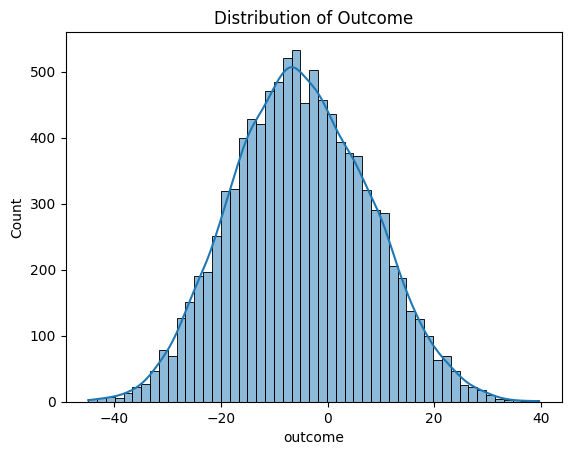

In [4]:
sns.histplot(train_data["outcome"], kde=True)
plt.title("Distribution of Outcome")
plt.show()

Checking correlation with outcome

In [5]:
correlation = train_data.corr(numeric_only=True)
correlation["outcome"].sort_values(ascending=False)

outcome    1.000000
b3         0.225407
b1         0.173719
a1         0.149101
a4         0.122441
table      0.114977
x          0.020354
price      0.016967
y          0.015924
a7         0.012512
b5         0.012370
a2         0.008760
a8         0.007983
a6         0.007238
a9         0.005361
a3         0.003126
carat      0.002538
a10        0.002492
b2         0.001640
a5         0.000690
b6         0.000079
b8        -0.002645
b4        -0.003845
b9        -0.007324
b7        -0.009241
b10       -0.012036
z         -0.031470
depth     -0.411073
Name: outcome, dtype: float64

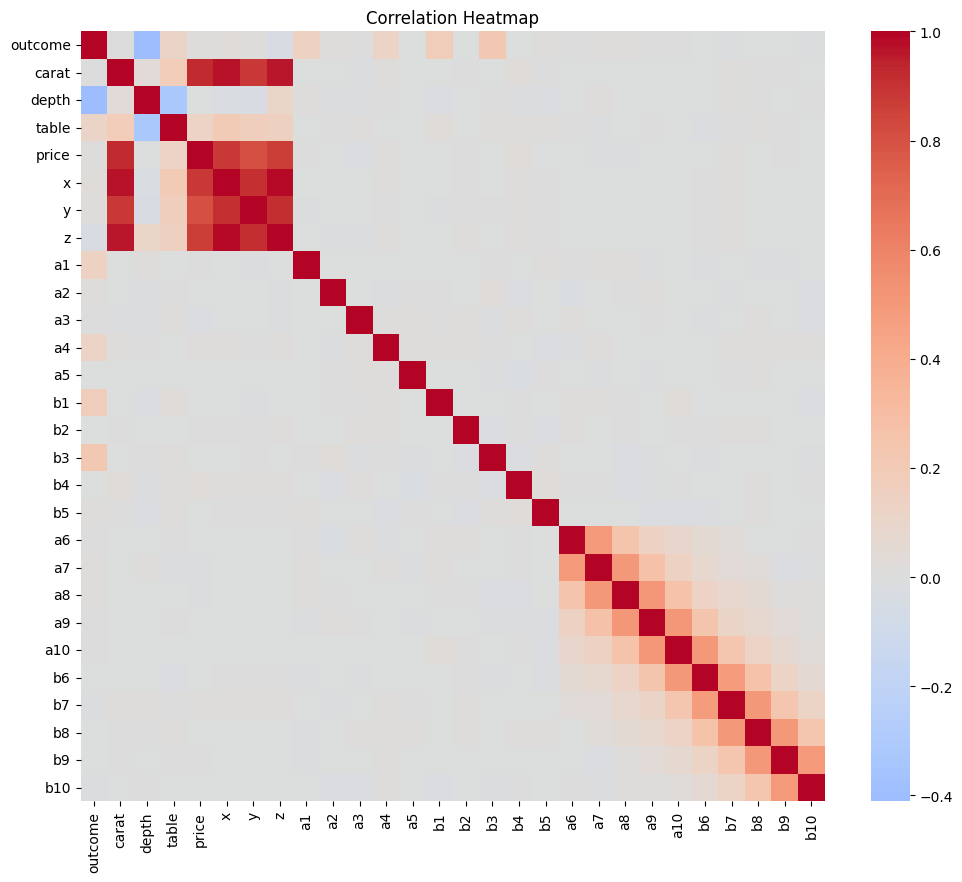

,feature,VIF
6,z,95.507915
4,x,95.491002
0,carat,30.230491
5,y,7.123805
3,price,7.056461
1,depth,2.703415
20,a9,1.707906
19,a8,1.697898
21,a10,1.696602
24,b8,1.676654


In [6]:
# Correlation heatmap (collinearity)

plt.figure(figsize=(12,10))
sns.heatmap(correlation, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

X_numeric = train_data.select_dtypes(include=["float64","int64"]).drop(columns=["outcome"])
X_const = add_constant(X_numeric)

vif_data = pd.DataFrame()
vif_data["feature"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1) 
                   for i in range(len(X_numeric.columns))]

vif_data.sort_values("VIF", ascending=False)

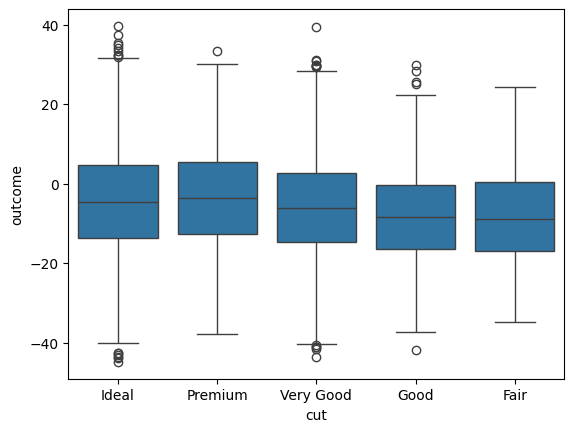

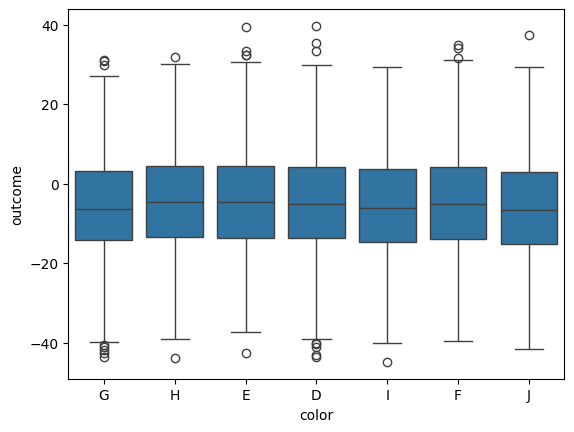

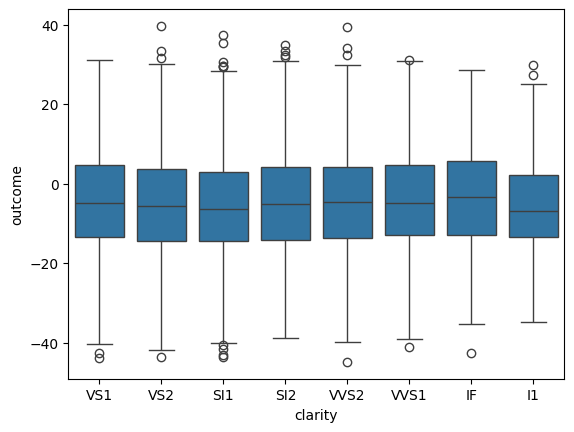

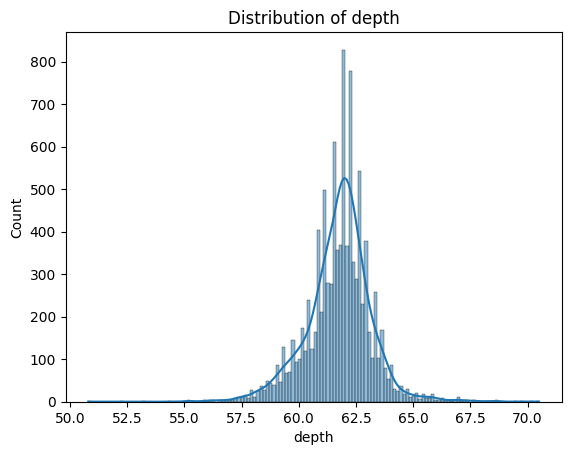

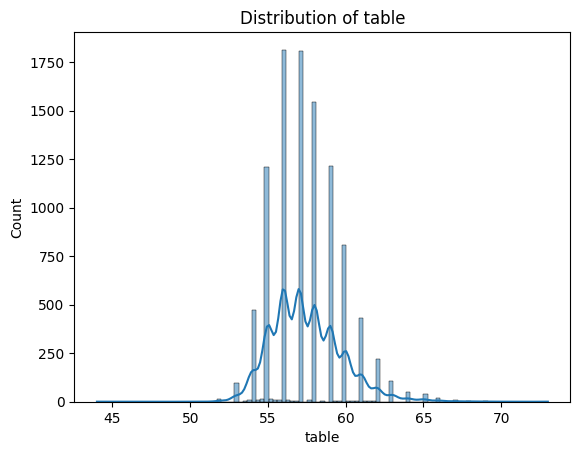

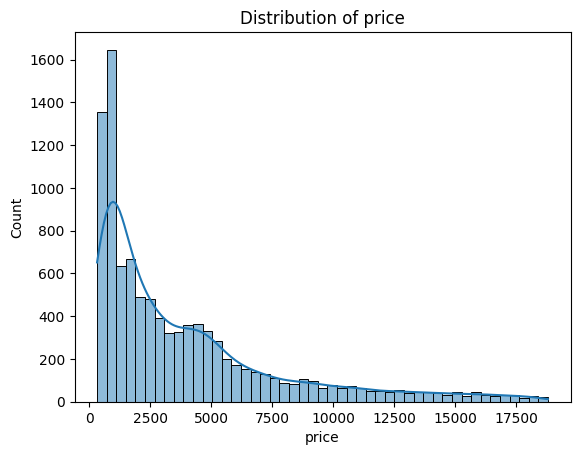

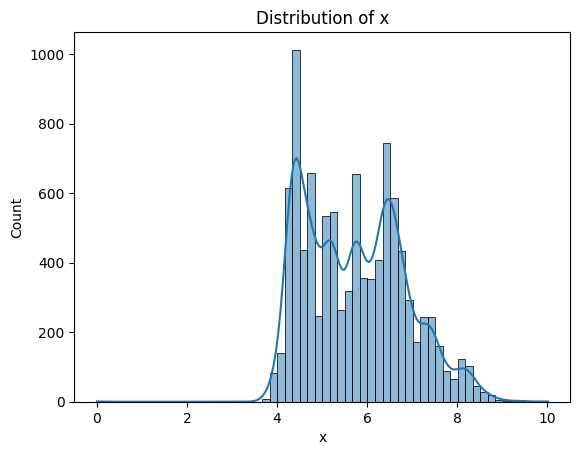

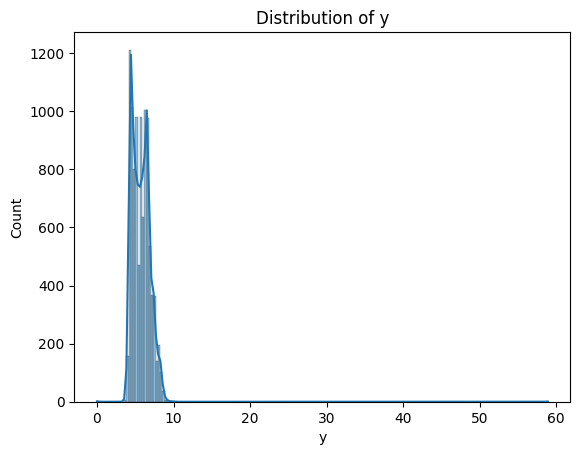

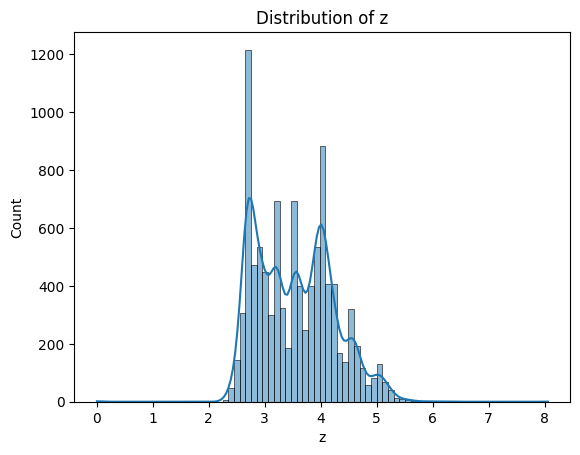

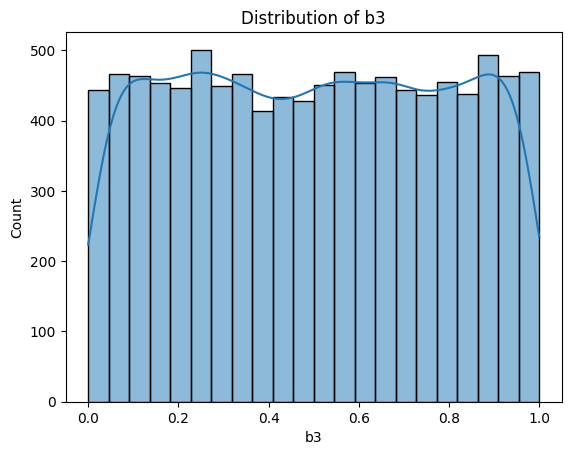

In [7]:
# Categorical Analysis

sns.boxplot(x="cut",y="outcome",data=train_data)
plt.show()

sns.boxplot(x="color",y="outcome",data=train_data)
plt.show()

sns.boxplot(x="clarity",y="outcome",data=train_data)
plt.show()

numeric_cols = ['depth', 'table', 'price', 'x', 'y', 'z', 'b3']

for col in numeric_cols:
    plt.figure()
    sns.histplot(train_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


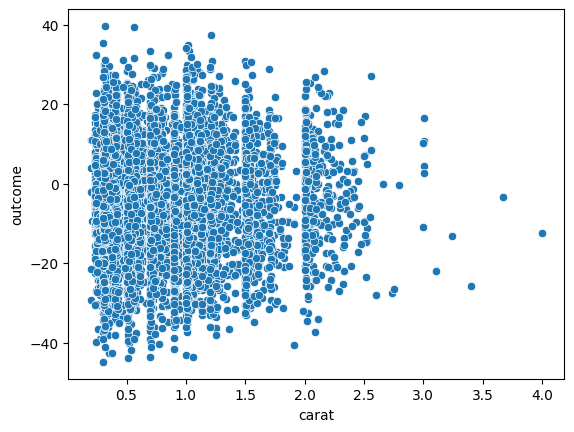

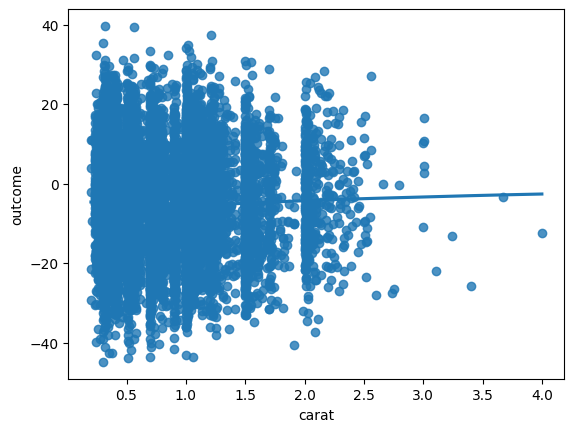

In [8]:
# Checking non linear patterns

sns.scatterplot(x="carat",y="outcome",data=train_data)
plt.show()

sns.regplot(x="carat",y="outcome",data=train_data,lowess=True)
plt.show()

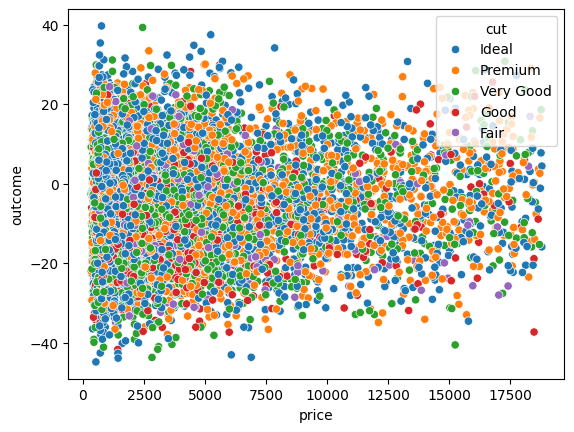

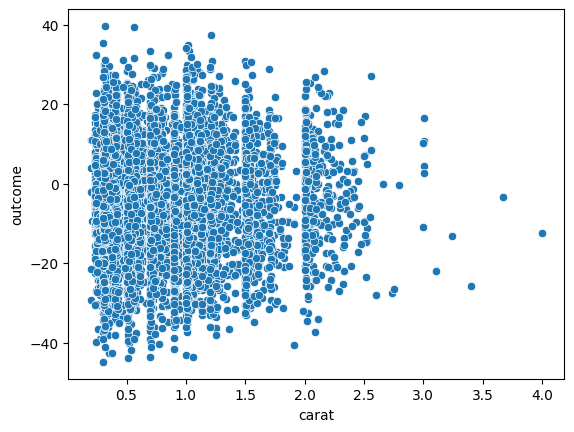

In [9]:
# Check interaction effects

sns.scatterplot(x="price",y="outcome",hue="cut",data=train_data)
plt.show()

# Check heteroskedasticity

sns.scatterplot(x=train_data["carat"], y=train_data["outcome"])
plt.show()